## Onedrive Link to this project: 

https://xmueducn-my.sharepoint.com/:f:/g/personal/ait2009367_xmu_edu_my/Egpmr46ihO5CpQ6C_InnIfwBvv3d3Qi7-esJPRaubyQz5w?e=P7bQNL

@Time ：2023/7/7 

@Auth ：**He Enhao, Bi Xiaoyang, Wang Qipeng, Li Haoyang**

@File ：Play Atari games with DDQN by Pytorch in **gym-retro** platform.

@IDE ：Jupyter notebook

@Environment: gym==0.21, python==3.8, pytorch==1.10.0

# Contents:

    1. Introduction
    2. Problem formulation 
    3. Data preparation
    4. Processing pipeline 
    5. Experimental results and discussion
    6. Conclusion

In this project, we explored the application of Deep Q-Networks (DQN) in the Atari 2600 gaming environment, aiming to create AI agents that choose the best action and used preprocessed pixels as features in two game environments, ***Pong-Atari 2600*** and ***MsPacMan-Atari2600***. To train them, we feed them into a convolutional neural network (CNN), also known as deep Q-learning. We implemented an improved Deep Q-Learning Network structure, called **Double Deep Q-Learning Network structure**. At the same time, we conducted several experiments and optimized some hyperparameters to test our model. Details will be discussed accordingly.


---------------------------------------------------------------------------------------------------------

# 1. Introduction

The Atari 2600 is an iconic gaming console released in 1977 and has been a pioneering platform in the home video gaming industry. Its games, such as Pong and Ms. Pac-Man, provide diverse and challenging environments for testing and implementing reinforcement learning algorithms. In this project, we implement DQN in the OpenAI "Gym-retro" platform for two Atari games: Pong and Ms. Pac-Man to explore the capabilities of reinforcement learning in game-playing scenarios.

### Introduction of Atari Pong Game:
Atari 2600 Pong is one of the earliest arcade games released by Atari in 1972, and it simulates table tennis in a two-dimensional environment. In this game, players control paddles on either side of the screen, competing against each other to reach 21 points first. Points are awarded when one player fails to return the ball. The game requires strategic movement of the paddles, offering three options: "Stay", "Up", and "Down". This simple yet challenging game serves as an excellent environment for training AI agents, testing their ability to learn and adapt to different game strategies.

### Introduction of MsPacMan Game:
Ms. Pac-Man was released by Namco in 1982, and it is another classic game available on the Atari 2600 platform. This game introduces more complexity compared to Pong, requiring players to navigate Ms. Pac-Man through a maze while avoiding four colorful ghosts. The goal is to eat all the small dots and the four large dots, known as Power Pellets, which temporarily empower Ms. Pac-Man to eat the ghosts for higher scores. The game's 8-bit style graphics and simple sound effects add to its charm and nostalgic appeal. The strategic gameplay and iconic status of Ms. Pac-Man make it an ideal choice for exploring the capabilities of AI in more complex game environments.

In both games, the AI agents are trained to learn from the raw pixel inputs, representing a significant step towards general AI. The goal of this project is to explore how well these AI agents can learn and adapt to different game strategies, providing insights into the capabilities and limitations of current reinforcement learning algorithms.

# 2.Problem Formulation

### For Pong-Atari2600:

**Problem Description**: We will use the Pong environment as a multiplayer game environment, where AI agents trained by each team compete against each other/computer.

**Problem Type**: This is a multiplayer reinforcement learning problem where AI agents are trained to play the game of Pong and compete against each other/computer.

**Dataset**: The dataset consists of game data from multiple rounds of gameplay in the Pong environment, including game states and reward information.

**Objective**: The objective is to train AI agents that can defeat the computer AI/AI trained by other groups in the game of Pong by being the first to score 21 points.

**Evaluation Metric**: The agent's performance is evaluated based on the reward obtained during gameplay. The agent with a higher reward, indicating a better performance, is considered the winner.

**Preprocessing Steps**: The incoming game states are preprocessed by converting RGB images to grayscale, scaling, and applying necessary transformations.

**Methods and Algorithm Selection**: We choose to use the DQN (Deep Q-Network) algorithm as the baseline model and explore various improved models based on it.

**Time and Resource Constraints**: Due to GPU limitations, we need to make efficient use of time and resources during the training process.

**Expected Results**: The expected outcome is to train AI agents that can defeat the computer AI in the game of Pong through deep reinforcement learning. The agents' performance will be measured by their ability to achieve a higher score and win the game.

### For MsPacMan-Atari2600:

**Problem Description**: We will use the MsPacMan-Atari2600 environment to train an AI agent to play the game of Ms. Pac-Man effectively.

**Problem Type**: This is a reinforcement learning problem where the goal is to train an AI agent using deep reinforcement learning to achieve a high score in the game of Ms. Pac-Man.

**Dataset**: The dataset consists of game data from multiple rounds of gameplay in the MsPacMan-Atari2600 environment, including game states and reward information.

**Objective**: The objective is to train an AI agent that can navigate the maze, eat all the small dots, avoid ghosts, and maximize the in-game score in the game of Ms. Pac-Man.

**Evaluation Metric**: The agent's performance is evaluated based on the obtained reward or score. A higher score indicates a better performance.

**Preprocessing Steps**: The incoming game states are preprocessed by converting RGB images to grayscale, reducing complexity, and applying necessary scaling and transformations.

**Methods and Algorithm Selection**: We choose to use the DQN (Deep Q-Network) algorithm as the baseline model and investigate various improved models based on it.

**Time and Resource Constraints**: Due to GPU limitations and training time, we need to efficiently use time and resources during the training process.

**Expected Results**: The expected outcome is to train an intelligent AI agent that can effectively navigate the maze, eat dots, avoid ghosts, and achieve a high score in the game of Ms. Pac-Man. The agent's performance will be evaluated based on its ability to maximize the in-game score.

# 3.Data Preparation

OpenAI's "gym-retro" framework provides us with the dataset we need, i.e., observations for each time step. An observation consists of the pixel values of the game screen, which are taken in a window of ***4*** consecutive frames. This is a numpy. array of shape **(210, 160, 3)**, where the first value x is the height of the screen, the second value y represents the width of the screen, and the third value represents the RGB dimension of each pixel on the coordinates (x, y).
We simply select the original pixels processed as black and white pixels in binary as features and shrink the screen.

# 4.Processing Pipeline

In this section, we introduce a **Reinforcement Learning process** for training intelligent agents to solve the tasks in gym-retro atari game environments. First, we create a wrapper to connect the environment and the agent, and do preprocessing to transform the input. Next, we train the agent's policy or value function using machine learning algorithms or deep learning models. After training, we save the model parameters for future use. We then evaluate the agent's performance and examine the results, conducting test dialogues and recording performance by interacting with the environment. Finally, key indicators in the training process, such as reward curves and policy improvement trends, are displayed through visualization tools to better understand and optimize the training process of the Agent. This pipeline is applicable to various tasks and algorithms, and helps us train and evaluate agents systematically.

 - ## Wrappers


We have implemented several wrappers to modify and enhance the functionality of the original environment. Here is an analysis of each wrapper and its role.

1. `RetroDiscretizer` function:
   - This function **discretizes the Retro Atari2600 environment**.
   - It takes the original environment object `env` and a list of valid action combinations `combos` as inputs.
   - It returns a discretized environment object.

2. `Discretizer` class:
   - This class is a wrapper that converts the action space of an environment into a discrete action space.
   - The `buttons` parameter is an ordered list of buttons corresponding to each dimension of the `MultiBinary` action space.
   - The `combos` parameter is an ordered list of valid button combinations.
   - During initialization, the class generates `_decode_discrete_action` based on the `combos` list. Each element of `_decode_discrete_action` is a boolean array representing a discrete action for the corresponding combo.
   - Finally, it replaces the action space with a `Discrete` type, with the number of discrete actions being the length of `_decode_discrete_action`.
 
3. `TimeLimit` class:
   - This class is a wrapper that limits the maximum number of steps per episode.
   - Each time the `step` method is called, it tracks the elapsed steps and checks if it exceeds the maximum limit.
   - If the limit is reached, it sets `done` to True and adds a key-value pair `'TimeLimit.truncated': True` to the `info` dictionary.
   - The `reset` method resets the elapsed steps to 0.

4. `SkipFrames` class:
   - This class is a wrapper that skips multiple frames and accumulates rewards.
   - It is initialized with the parameter `n`, specifying the number of frames to skip.
   - Each time the `step` method is called, it iteratively executes the environment's `step` method `n` times, accumulating rewards.
   - If `done` becomes True during the skipping process, it terminates the loop early.

5. `Rgb2Gray` class:
   - This class is a wrapper that converts observations **from RGB to grayscale**.
   - It modifies the observation space by changing the **number of channels from 3 to 1**.
   - The `observation` method uses OpenCV to convert the color frame to grayscale.

6. `Downsample` class:
   - This class is a wrapper that downsamples observations.
   - It scales down the width and height of the observation space to 84x84.
   - The `observation` method uses OpenCV to downsample the observation frame.

7. `FrameStack` class:
   - This class is a wrapper that stacks multiple consecutive frames to form a new observation.
   - It is initialized with the `k` parameter specifying the number of frames to stack. **[we set it as k=4]**
   - The `reset` method calls the environment's `reset` method to get the initial observation and adds it to the `frames` deque.
   - The `step` method executes the environment's `step` method to get a new observation and adds it to the `frames` deque.
   - Finally, it concatenates all frames in the `frames` deque along the channel dimension to form the new observation.

8. `make_env` function:
   - This function creates an environment that is processed by multiple wrappers.
   - It takes inputs such as the game name `game`, number of players `players`, valid action combinations `combos` and maximum episode steps `timeLimit`.
   - It creates the original environment object using `retro.make`.
   - Then, it applies the `PongDiscretizer`, `TimeLimit`, `SkipFrames`, `Rgb2Gray`, `Downsample`, and `FrameStack` wrappers in order to obtain the final environment object.

 - ## Action choosing


Note: Unwrapped Buttons is **['BUTTON', None, 'SELECT', 'RESET', 'UP', 'DOWN', 'LEFT', 'RIGHT']**.

###  Pong-Atari2600

For the **player=2** case, action is a vector of data type MultiBinary with dimension 16, e.g. act = np.array([1,0,0,0, 0,1, 1,0, 0,0, 0,0, 0,0,1]), this vector represents the left-handed player moving up and the right-handed player moving down

For the **player=1** case, we have to make sure that the first index of the action vector is 1, which is the button that controls all Atari games. In this game, the first index is used to control the serve of the winner of the previous ball. And the third to fourth indexes are used to control the up and down moves of the player respectively. And we make it into a discrete space.


We created the *_decode_discrete_action* list by hard-coding it. This list is designed to handle the player's discrete actions, specifically, mapping the **DOWN** button to index 5, the **UP** button to index 4, and the **BUTTON** button to index 0.

And we made the action combo manully to **[[],['BUTTON'],['UP'],['DOWN'],['BUTTON','UP'],['BUTTON','DOWN']]**. There are two reasons why we want to make this action combo:
   - The shape of action space after wrapping need to be ***Discrete(6)*** because it can access the given competition environment and compete with AI computer agent.
   - Simulate the action in Pong-NoFrameSkipv4 environment, whose action space is [['NOOP'],['FIRE'],['LEFT'],['RIGHT'],['FIRE','LEFT'],['FIRE','RIGHT']].
So after wrapping, the action space is: 

*[array([False, False, False, False, False,  False, False, False]), array([True, False, False, False, False, False , False, False])*

*array([False, False, False, False,  True, False, False, False]), array([False , False, False, False, False, True, False, False]),*

*array([True, False, False, False, False,  True, False, False]),array([True, False, False, False, True, False , False, False])]*

In fact, there are only **3** valid actions, which are **Up, Down and no movement** (where Up and ButtonUp are the same, Down and BottonUp are the same, Noop('[]') and Button are the same).

### MsPacMan-Atari2600



We made the action combo manully to [[],['BUTTON'],['UP'],['DOWN'],['BUTTON','UP'],['BUTTON','DOWN']]. There are two reasons why we want to make this action combo:

The shape of action space after wrapping need to be Discrete(6) because it can access the given competition environment by lecturer and compete with AI computer agent.
Simulate the action in Pong-NoFrameSkipv4 environment, which its action space is [['NOOP'],['FIRE'],['LEFT'],['RIGHT'],['FIRE','LEFT'],['FIRE','RIGHT']]. So after wrapping, the action space is:
[array([False, False, False, False, False, False, False, False]), array([True, False, False, False, False, False , False, False])

array([False, False, False, False, True, False, False, False]), array([False , False, False, False, False, True, False, False]),

array([True, False, False, False, False, True, False, False]),array([True, False, False, False, True, False , False, False])]

In fact, there are only 3 valid actions, which are Up, Down and no movement (where Up and ButtonUp are the same, Down and BottonUp are the same, Noop('[]') and Button are the same).

In this environment，we "tell" MS. PAC-MAN **up, down, right and left** around the maze. It also used to guide the MS. PAC-MAN to slide in and out of tunnels on both sides of the maze. And we also created the _decode_discrete_action list by hard-coding it. This list is designed to handle the player's discrete actions, so it maps the UP button to index 4, the DOWN button to index 5, the LEFT button to index 6, and the Right button to index 7.

If MS. PAC-MAN exits on the right, she re-enters on the left; if she exits on the left, she re-enters on the right.

- ## Methodology

In this study, we focused on the application of Deep Q-Networks (DQN) in the Atari 2600 gaming environment, with the goal of creating AI agents capable of producing optimal actions based on preprocessed pixel features. We tested our model in two gaming environments: Pong-Atari 2600 and MsPacMan-Atari2600. The training input to our Convolutional Neural Network (CNN) was the pixel data from the game frames.

We utilized an enhanced structure known as the Double Deep Q-Learning Network to better address the reinforcement learning problem. We optimized hyperparameters and performed various experiments to ensure the effectiveness of our model.

The following subsections provide a detailed description of the techniques and the architecture used in our project.

- ### Q-Learning

Q-learning is a value-based Reinforcement Learning algorithm aimed at training an agent to follow a policy that dictates the best action to take under specific circumstances.

 - ### Deep Q-Learning

Deep Q-Learning combines Q-Learning with deep neural networks. The algorithm employs a neural network as a function approximator to estimate the Q-values (value of state-action pairs). Instead of a table, we use a deep neural network as a function approximator for the Q-value. The network inputs a state representation and outputs a Q-value for each action. This adjustment allows us to handle much larger state spaces efficiently. Theoretically, the network's target is the true Q-values, but in practice, we use the reward + (gamma * Q(next_state)) as the network's target. The network is then trained to minimize the difference between the predicted Q-values and the targets. Once the DQN is well-trained, the agent can select appropriate actions based on these Q-values.

  - ### Experience Replay

Experience Replay is a technique used to tackle two main issues in reinforcement learning: sample correlation and non-stationarity. It stores the agent's experiences at each time step in a data set called the replay buffer. The model is then trained on random samples from this buffer rather than consecutive experiences, reducing sample correlation and stabilizing the learning process.

- ## Applied Model

DQN has demonstrated its prowess in learning from raw pixels, enabling agents to outperform human-level performance on various Atari games. Our work delves into the process of training DQN agents.

### Basic DQN Architecture:


  **conv1_layer**: input: torch tensors with the size of (4,84,84), output: (32,20,20)

  **conv2_layer**: input: previous output, output: (64,9,9)

  **conv3_layer**: input: previous output, output: (64,7,7)
    
  **flatten**: # reshape the tensor to (-1,64 * 7 * 7)
    
  **fc1_layer**: # input: 64 * 7 * 7 nodes, output: 512 nodes
    
  **fc2_layer**: # input: previous output, output: num_actions nodes

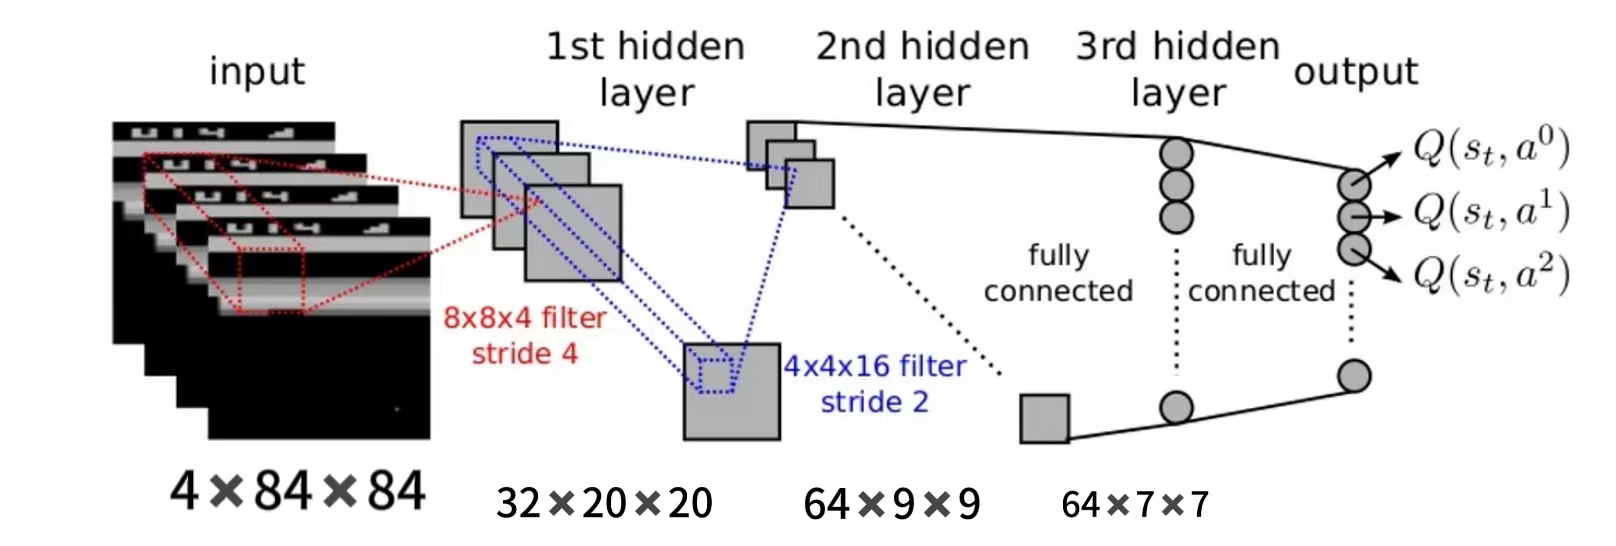

### Double DQN:

In Double DQN, we use two DQN networks, namely the "evaluation network" (q_eval) and the "target network" (q_next). Both networks have the same architecture, but their parameters are independent of each other.
The q_eval network selects actions at each timestep based on predicted Q-values. Meanwhile, the q_next network generates the target Q-values for training the q_eval network. We update the q_eval network using gradient descent based on the mean squared error loss between the predicted and target Q-values. The q_next parameters are periodically updated with q_eval parameters at fixed intervals.

## Training Process:
We implemented the training process as a function within the Agent class. Each episode starts with a score of 0 and an environment reset(env.reset()). Then the agent starts to play the game controlled by the policy based on the current q_eval network. After each step, the reward,state,next_state and done are recorded in the replay buffer. The replay buffer would sample 32(batch_size) steps' experience to form a batch, where state is fed into q_eval network to predict Q-values and next_state is input into q_next network to formulate target Q-values. Then the q_eval network can be trained using the MSE loss between the predicted and target Q-values. The parameters of q_next would be replaced by those of q_eval after every 1000 steps. After the networks converge to optimum, we can use the q_eval network to estimate the Q-value of each state-action pair, which allows us to choose the best action at each state. 

# 5.Experimental Results and Discussion

### For Pong-Atari 2600：
We trained Double DQN Agent in two different environments, namely *Pong in ***gym*** and Pong in ***gym retro***. The agent has a splendid performance in gym environment, where it managed to defeat the computer after 700 episodes of training, and the final score was 18 in testing.

However, the same level of success was not replicated in the gym retro environment. Despite approximately 5000 episodes of training, network convergence was not achieved. Over the span of 2000 episodes, the average score remained below -19, as evidenced by the training log. As a result, our agent may only get 1-2 scores in the testing, or even 0 scores sometimes.

We attribute these distinctions in training results to the difference between these two environments. In fact, the Pong in gym, specifically PongNoFrameskip-v4, is a simplified version of the game Pong. The Pong game in this environment is implemented through an emulator, and training can be conducted without skipping any frames. In other words, every frame's state is visible. The game rules are relatively simple, involving two players controlling paddles to bounce a ball and try to make the opponent miss hitting the ball. Due to its simplicity, training DDQN in this environment is relatively quick and straightforward.

On the other hand, the Pong game in retro is a classic and original version, which is implemented by emulating the Atari 2600 gaming console. Unlike PongNoFrameskip-v4, it requires skipping some image frames to simulate real game execution. Therefore, it is more complex and challenging than PongNoFrameskip-v4, which requires more sophisticated algorithms as well. We assume that's why we failed to make the DDQN converge in retro environments.

### For MsPacMan-Atari2600:
Our second test involved training the Double DQN agent on the *MsPacMan-Atari2600 game* in the ***gym-retro*** environment. . The agent performed well, with an average score increase from 190 to 352 over 1000 training episodes, and a final test score of 490. We deduced from the agent's training log and the downward trend of loss during training that it adapted well to the game. This game, unlike Pong, does not require competition with an AI and has lower environment complexity, reducing convergence difficulty and improving performance.

Following our evaluation, we attribute these results to the game's comparatively lower complexity and training difficulty. Furthermore, as the goal is primarily to score higher rather than compete against an AI, it eases the model's convergence difficulty.


# 6.Conclusion

Through our research, we have effectively showcased the pivotal role of DQN in the Atari 2600 gaming environment. Our results demonstrate the immense potential of deep reinforcement learning, effectively overcoming complex challenges in the realm of visual-based game-playing agents. This paradigm shift signifies a monumental leap forward in our pursuit of creating more adaptable and proficient artificial intelligence agents.

In future, our research endeavors will extend beyond the existing scope and explore augmentations to the DQN Reinforcement Learning paradigm. We aim to develop algorithms that learn more efficiently and can adapt to an even wider range of environments. This research is an ongoing journey towards unlocking the immense potential of artificial intelligence in not only gaming but various real-world applications.

# Import the retro-games

In [ ]:
!python -m retro.import .

In [ ]:
!python -m retro.import ROMS

# Import the library

In [2]:
import os
import cv2
import gym
import retro
import imageio
import numpy as np
from time import time
import matplotlib.pyplot as plt
from collections import deque
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# Set device

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Environment Wrappers

In [4]:
def RetroDiscretizer(env,combos):
    """
    Discretize Retro Atari2600 environment
    """
    return Discretizer(env, buttons=env.unwrapped.buttons, combos=combos)
    

class Discretizer(gym.ActionWrapper):
    """
    Wrap a gym environment and make it use discrete actions.
    based on https://github.com/openai/retro-baselines/blob/master/agents/sonic_util.py
    Args:
        buttons: ordered list of buttons, corresponding to each dimension of the MultiBinary action space
        combos: ordered list of lists of valid button combinations
    """

    def __init__(self, env, buttons, combos):
        super().__init__(env)
        assert isinstance(env.action_space, gym.spaces.MultiBinary)
        self._decode_discrete_action = []
        for combo in combos:
            arr = np.array([False] * env.action_space.n)
            for button in combo:
                arr[buttons.index(button)] = True
            self._decode_discrete_action.append(arr)
        
        self.action_space = gym.spaces.Discrete(len(self._decode_discrete_action))

    def action(self, act1):
        act1_v = self._decode_discrete_action[act1].copy()
        return act1_v.copy()
    
    def step(self, act1):
        return self.env.step(self.action(act1))

# Limit the episode length
class TimeLimit(gym.Wrapper):
    def __init__(self, env, max_episode_steps=None):
        super().__init__(env)
        self._max_episode_steps = max_episode_steps
        self._elapsed_steps = 0

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self._elapsed_steps += 1
        if self._elapsed_steps >= self._max_episode_steps:
            done = True
            info['TimeLimit.truncated'] = True
        return obs, reward, done, info

    def reset(self, **kwargs):
        self._elapsed_steps = 0
        return self.env.reset(**kwargs)

# Skip frames
class SkipFrames(gym.Wrapper):
    def __init__(self, env, n = 4):
        gym.Wrapper.__init__(self, env)
        self.n = n

    def step(self, action):
        done = False
        totalReward = 0.0
        for _ in range(self.n):
            obs, reward, done, info = self.env.step(action)
            totalReward += reward
            if done:
                break
        return obs, totalReward, done, info

# Convert observation to greyscale
class Rgb2Gray(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)
        (oldh, oldw, _oldc) = env.observation_space.shape
        self.observation_space = gym.spaces.Box(low = 0, high = 255,
                                                shape = (oldh, oldw, 1),
                                                dtype = np.uint8)

    def observation(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        return frame[:,:,None]

# Downsample the observation
class Downsample(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)
        (oldh, oldw, oldc) = env.observation_space.shape
        #newshape = (oldh//ratio, oldw//ratio, oldc)
        newshape = (84,84,oldc)
        self.observation_space = gym.spaces.Box(low = 0, high = 255,
                                                shape = newshape,
                                                dtype = np.uint8)

    def observation(self, frame):
        height, width, _ = self.observation_space.shape
        frame = cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)
        if frame.ndim == 2:
            frame = frame[:, :, None]
        return frame

class FrameStack(gym.Wrapper):
    def __init__(self, env, k):
        gym.Wrapper.__init__(self, env)
        (oldh, oldw, _oldc) = env.observation_space.shape
        newStackShape = (oldh, oldw, k)
        self.observation_space = gym.spaces.Box(low = 0, high = 255,
                                                shape = newStackShape,
                                                dtype = np.uint8)
        self.k = k
        self.frames = deque([], maxlen = k)

    def reset(self):
        obs = self.env.reset()
        for _ in range(self.k):
            self.frames.append(obs)
        return self._get_obs()

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_obs(), reward, done, info

    def _get_obs(self):
        assert len(self.frames) == self.k
        return np.concatenate(self.frames, axis = 2)

# combine the wrappers
def make_env(game,players,combos, timeLimit):
    env = retro.make(game=game, players=players)
    env = RetroDiscretizer(env, combos=combos)
    env = TimeLimit(env, timeLimit)
    env = SkipFrames(env)
    env = Rgb2Gray(env)
    env = Downsample(env)
    env = FrameStack(env, 4)
    return env

## Random play of MsPacman:

In [5]:
try:
    if env:
        env.close()
except NameError:
    pass

env = retro.make(game='MsPacman-Atari2600')
possible_actions = np.array(np.identity(env.action_space.n,dtype=int).tolist())
def random_play():
    score = 0
    env.reset()
    for i in range(2000):
        env.render()
        action = possible_actions[np.random.randint(len(possible_actions))]
        state, reward, done, _ = env.step(action)
        score += reward
        if done:
            print("Your Score at end of game is: ", score)
            break
    env.reset()
    env.render(close=True)
random_play()
env.close()

Your Score at end of game is:  200.0


# Utility functions

In [6]:
# Render avi or gif
def renderFrames(frame_array, savePath, fileName, fps, otype='AVI'):
    print('Creating replay ...', end=' ')
    if otype == 'AVI':
        fileName += '.avi'
        height, width, layers = frame_array[0].shape
        if layers == 1:
            layers = 0
        size = (width, height)
        out = cv2.VideoWriter(savePath + fileName, cv2.VideoWriter_fourcc(*'DIVX'), fps, size, layers)
        for i in range(len(frame_array)):
            out.write(frame_array[i])
        out.release()
        print('Done. Saved to {}'.format(savePath + fileName))
    else:
        print('Error: Invalid type, must be AVI.')

# Get current date/time foramtted as string
def Now():
    # subtract 6 hours to get correct tz
    now = datetime.now() - timedelta(hours=6)
    return now.strftime('%m_%d_%Y_%H%M%S')

# save the log to file
def saveLog(savePath, fileName, log):
    print('Saving log ...', end=' ')
    fileName += '.log'
    f = open(savePath + fileName, 'w')
    for line in log:
        f.write(line + '\n')
    f.write(Now())
    f.close()
    print('Done. Saved to {}'.format(savePath + fileName))

## Build DDQN Architecture

In [7]:
class ReplayBuffer():
    ''' Keeps track of states, actions, rewards, and terminal flags the agent encounters while playing game for sampling later. '''
    def __init__(self, max_size, input_shape):
        self.memory_size = max_size
        self.memory_cntr = 0
        self.state_memory = torch.zeros(self.memory_size,input_shape[2],input_shape[0],input_shape[1], dtype=torch.float32)
        self.new_state_memory = torch.zeros(self.memory_size,input_shape[2],input_shape[0],input_shape[1], dtype=torch.float32)
        self.action_memory = torch.zeros(self.memory_size, dtype=torch.long)
        self.reward_memory = torch.zeros(self.memory_size, dtype=torch.float32)
        self.terminal_memory = torch.zeros(self.memory_size, dtype=torch.uint8)

    def store_transition(self, state, action, reward, new_state, done):
        index = self.memory_cntr % self.memory_size

        #transform numpy array into torch tensor
        state = torch.from_numpy(state).reshape((state.shape[2],state.shape[0],state.shape[1]))
        new_state = torch.from_numpy(new_state).reshape((new_state.shape[2],new_state.shape[0],new_state.shape[1]))

        self.state_memory[index] = state
        self.new_state_memory[index] = new_state
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = done
        self.memory_cntr += 1

    def sample_buffer(self, batch_size):
        mx = min(self.memory_cntr, self.memory_size)
        batch = np.random.choice(mx, batch_size, replace=False)
        states = self.state_memory[batch]
        new_states = self.new_state_memory[batch]
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch]
        dones = self.terminal_memory[batch]

        return states, actions, rewards, new_states, dones


#create a deep Q network
class DQN(nn.Module):
    def __init__(self, num_actions, fc1_dims, in_channels=4):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(64 * 7 * 7, fc1_dims)
        self.fc2 = nn.Linear(fc1_dims, num_actions)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = x.float() / 255
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = x.view(-1,64 * 7 * 7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
    
        return x
    
    
class Agent(object):
    ''' stores agent paramters like learning rate, discount factor, etc... '''
    def __init__(self, lr, gamma, num_actions, epsilon, batch_size, replace, input_dims, eps_dec=1e-5,
               eps_min=0.01, memory_size=1000000):
        self.action_space = list(range(num_actions))
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = eps_dec
        self.eps_min = eps_min
        self.batch_size = batch_size
        self.replace = replace
        self.learn_step = 0
        self.memory = ReplayBuffer(memory_size, input_dims)
        self.q_eval = DQN(num_actions=num_actions,fc1_dims=512).to(device)
        self.q_next = DQN(num_actions=num_actions,fc1_dims=512).to(device)
        self.log = []
        self.scores = []

    def replace_target_network(self):
        if self.replace is not None and self.learn_step % self.replace == 0:
            self.q_next.load_state_dict(self.q_eval.state_dict())

    def store_transition(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)

    def choose_action(self, observation):
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            state = torch.from_numpy(observation).reshape((1,observation.shape[2],observation.shape[0],observation.shape[1]))
            state = state.type(torch.float32).to(device)
            actions = self.q_eval(state) 
            action = torch.argmax(actions)

        return action

    def learn(self):
        if self.memory.memory_cntr > self.batch_size:
            states, actions, rewards, new_states, dones = self.memory.sample_buffer(self.batch_size)
            states = states.to(device)
            new_states = new_states.to(device)
            
            self.replace_target_network()

            #forward the states and get action values
            q_eval = self.q_eval(states)
            q_next = self.q_next(new_states)

            #construct the network target 
            q_target = q_eval[:].to('cpu')
            indices = np.arange(self.batch_size)
            q_next_cpu = q_next.to('cpu')
            q_target[indices, actions] = rewards + self.gamma * torch.max(q_next_cpu, dim=1)[0] * (1 - dones)
            q_target = q_target.to(device)

            #train the network
            loss = nn.MSELoss()
            optimizer = torch.optim.Adam(self.q_eval.parameters(),lr=self.lr)

            l = loss(q_eval,q_target)
#             print('Loss: {}'.format(l))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            #decay the epsilon
            self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min
            self.learn_step += 1

    def save_models(self, savePath):
        print('Saving models ...', end=' ')
        torch.save(self.q_eval.state_dict(),savePath + 'DQN_eval.pth')
        torch.save(self.q_next.state_dict(),savePath + 'DQN_next.pth')
        print('Done.')

    def load_models(self, evalPath, nextPath):
        print('Loading models ...', end=' ')
        self.q_eval.load_state_dict(torch.load(evalPath))
        self.q_next.load_state_dict(torch.load(nextPath))
        print('Done.')

    def train(self, env,num_episodes=100):
        sTime = time()
        for i in range(num_episodes):
            score = 0
            obs_current = env.reset()
            done = False
            steps = 0
            while not done:
                action = self.choose_action(obs_current)
                obs_next, reward, done, info = env.step(action)
                score += reward
                self.store_transition(obs_current, action, reward, obs_next, int(done))
                self.learn()
                obs_current = obs_next
                steps += 1
            self.scores.append(score)
            logStr = 'Episode: {:d}/{:d} Steps: {:d} Score: {} Average: {}'.format(
              i+1, num_episodes, steps, score, round(np.average(self.scores), 2))
            self.log.append(logStr)
            print(logStr)
        eTime = round(time() - sTime, 4)
        logStr = 'Model was trained on {} episodes which took {} seconds'.format(
            num_episodes, eTime)
        self.log.append(logStr)
        print(logStr)

    def play_game(self, env):
        print('Playing game ...', end=' ')
        score = 0
        observation = env.reset()
        done = False
        steps = 0
        frames = []
        obsFrames = []
        while not done:
            action = self.choose_action(observation)
            observation, reward, done, info = env.step(action)
            score += reward
            steps += 1
            frames.append(env.render(mode='rgb_array'))
            obsFrames.append(observation)
        print('Done. Score: {}'.format(score))
        return frames, obsFrames

In [8]:
class Args:
    game = ['Pong-Atari2600', 'MsPacman-Atari2600']
    combos=[[[],['BUTTON'],['UP'],['DOWN'],['BUTTON','UP'],['BUTTON','DOWN']],
           [['LEFT'], ['RIGHT'], ['UP'], ['DOWN'],]]
    players=1
    savePath = './'

args = Args()

In [9]:
try:
    if env:
        env.close()
except NameError:
    pass

In [10]:
def training_process(gameIndex, comboIndex, numEpisodes=100, maxSteps=10000, load=False, train=True, save=False, play=True):
    env = make_env(args.game[gameIndex], args.players, args.combos[comboIndex], maxSteps)

    agent = Agent(gamma=0.99, epsilon=1.0, lr=0.0001, input_dims=env.observation_space.shape,
                num_actions=len(args.combos[comboIndex]), memory_size=10000, eps_min=0.02,
                batch_size=32, replace=1000, eps_dec=1e-5)

    if load:
        agent.load_models('./models/Pong_retro_eval.pth','./models/Pong_retro_next.pth')

    if train:
        agent.train(env, num_episodes=numEpisodes)
        fileName = 'DQN_training'
        saveLog(args.savePath, fileName, agent.log)

    if save:
        agent.save_models(args.savePath)

    if play:
        frames, obsFrames = agent.play_game(env)
        fileName = Args.game[gameIndex] + '_{}'.format(Now())
        renderFrames(frames, args.savePath, fileName, 60, otype='AVI')

    env.close()

    return agent,frames,obsFrames

def env_visualization(frames,obsFrame):
    fig, axes = plt.subplots(1,2,figsize=(15, 15), constrained_layout=True)
    index = np.random.choice(range(len(frames)))
    img1 = obsFrame[index].squeeze()
    img2 = frames[index].squeeze()
    axes[0].imshow(img1, cmap='gray')
    axes[1].imshow(img2)
    axes[0].set_title('Observation {}'.format(img1.shape))
    axes[1].set_title('Render {}'.format(img2.shape))
    fig.show()

def unstacked_frames(obsFrame):
    fig, axes = plt.subplots(2,2,figsize=(12, 12), constrained_layout=True)
    axes = axes.flatten()
    for i in range(4):
        axes[i].imshow(obsFrame[300][:, :, i], cmap='gray')

def score_visualization(agent,gameIndex):
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(agent.scores)), agent.scores, color='green')
    plt.xlabel('Num of episodes')
    plt.ylabel('Score')
    plt.title(Args.game[gameIndex])
    plt.show()

## Training and Visualization of Pong-Atari2600

In [18]:
env.close()

In [11]:
# train Pong game
pong_agent,pong_frames,pong_obsFrame = training_process(gameIndex=0,comboIndex=0,numEpisodes=100)

Episode: 1/100 Steps: 853 Score: -21.0 Average: -21.0
Episode: 2/100 Steps: 824 Score: -21.0 Average: -21.0
Episode: 3/100 Steps: 820 Score: -21.0 Average: -21.0
Episode: 4/100 Steps: 764 Score: -21.0 Average: -21.0
Episode: 5/100 Steps: 764 Score: -21.0 Average: -21.0
Episode: 6/100 Steps: 947 Score: -20.0 Average: -20.83
Episode: 7/100 Steps: 764 Score: -21.0 Average: -20.86
Episode: 8/100 Steps: 764 Score: -21.0 Average: -20.88
Episode: 9/100 Steps: 987 Score: -19.0 Average: -20.67
Episode: 10/100 Steps: 764 Score: -21.0 Average: -20.7
Episode: 11/100 Steps: 824 Score: -21.0 Average: -20.73
Episode: 12/100 Steps: 939 Score: -19.0 Average: -20.58
Episode: 13/100 Steps: 764 Score: -21.0 Average: -20.62
Episode: 14/100 Steps: 946 Score: -21.0 Average: -20.64
Episode: 15/100 Steps: 792 Score: -21.0 Average: -20.67
Episode: 16/100 Steps: 793 Score: -21.0 Average: -20.69
Episode: 17/100 Steps: 764 Score: -21.0 Average: -20.71
Episode: 18/100 Steps: 983 Score: -20.0 Average: -20.67
Episode

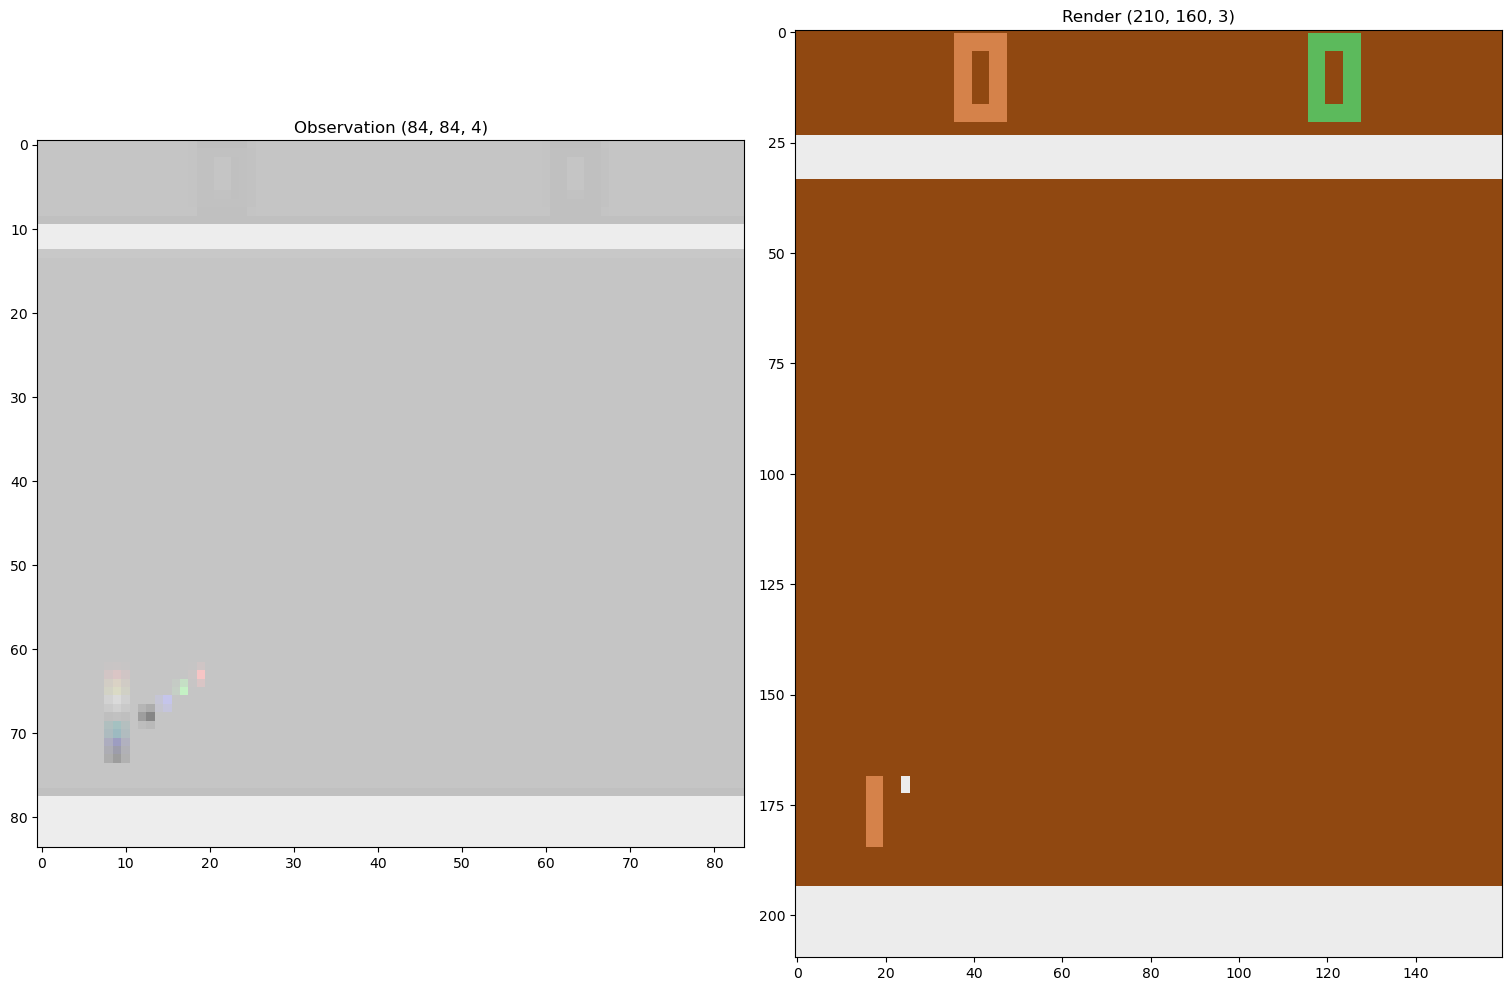

In [12]:
# comparison of the original and preprocessed frame
env_visualization(frames=pong_frames,obsFrame=pong_obsFrame)

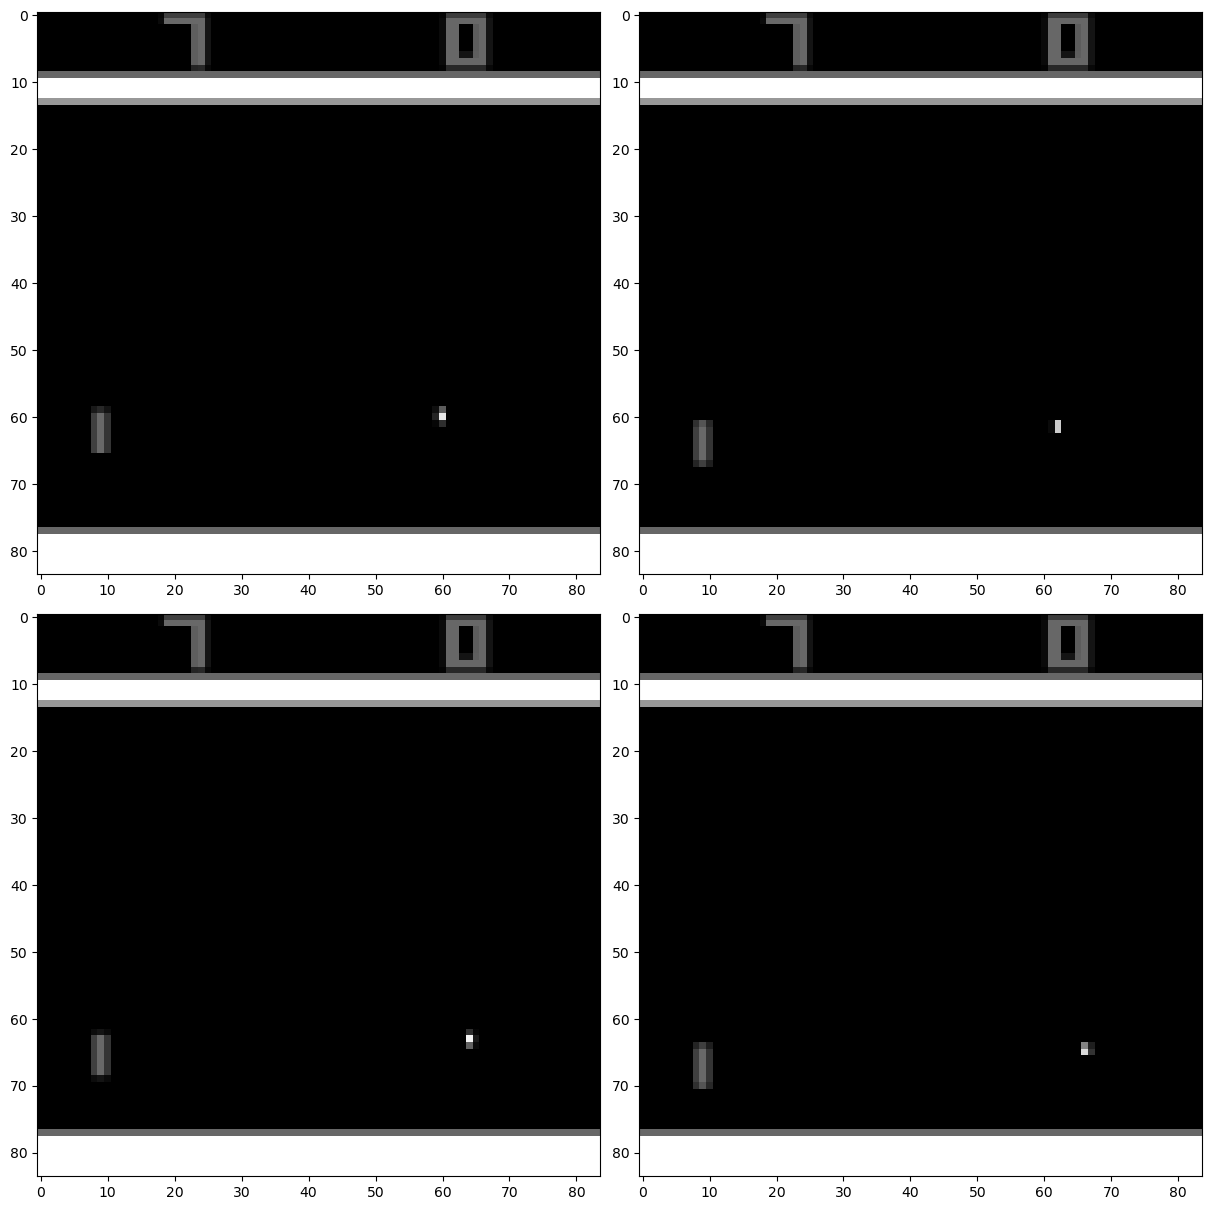

In [13]:
# visualization of the four frames before stacking
unstacked_frames(obsFrame=pong_obsFrame)

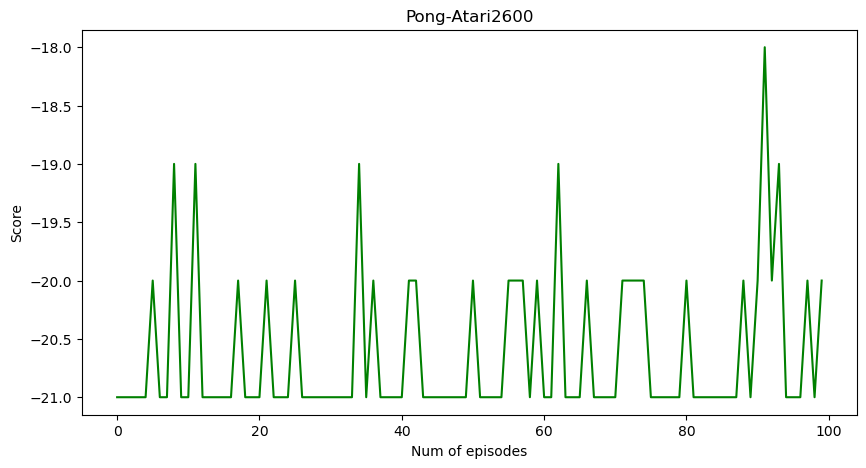

In [14]:
# visualization of scores in training 
score_visualization(agent=pong_agent,gameIndex=0)

## Training and Visualization of MsPacman-Atari2600

In [15]:
MP_agent,MP_frames,MP_obsFrame = training_process(gameIndex=1,comboIndex=1,numEpisodes=100)

Episode: 1/100 Steps: 491 Score: 220.0 Average: 220.0
Episode: 2/100 Steps: 499 Score: 300.0 Average: 260.0
Episode: 3/100 Steps: 479 Score: 200.0 Average: 240.0
Episode: 4/100 Steps: 397 Score: 190.0 Average: 227.5
Episode: 5/100 Steps: 531 Score: 200.0 Average: 222.0
Episode: 6/100 Steps: 513 Score: 170.0 Average: 213.33
Episode: 7/100 Steps: 427 Score: 170.0 Average: 207.14
Episode: 8/100 Steps: 635 Score: 480.0 Average: 241.25
Episode: 9/100 Steps: 561 Score: 260.0 Average: 243.33
Episode: 10/100 Steps: 519 Score: 240.0 Average: 243.0
Episode: 11/100 Steps: 471 Score: 270.0 Average: 245.45
Episode: 12/100 Steps: 505 Score: 180.0 Average: 240.0
Episode: 13/100 Steps: 625 Score: 590.0 Average: 266.92
Episode: 14/100 Steps: 435 Score: 210.0 Average: 262.86
Episode: 15/100 Steps: 429 Score: 170.0 Average: 256.67
Episode: 16/100 Steps: 491 Score: 250.0 Average: 256.25
Episode: 17/100 Steps: 743 Score: 3340.0 Average: 437.65
Episode: 18/100 Steps: 487 Score: 240.0 Average: 426.67
Episode

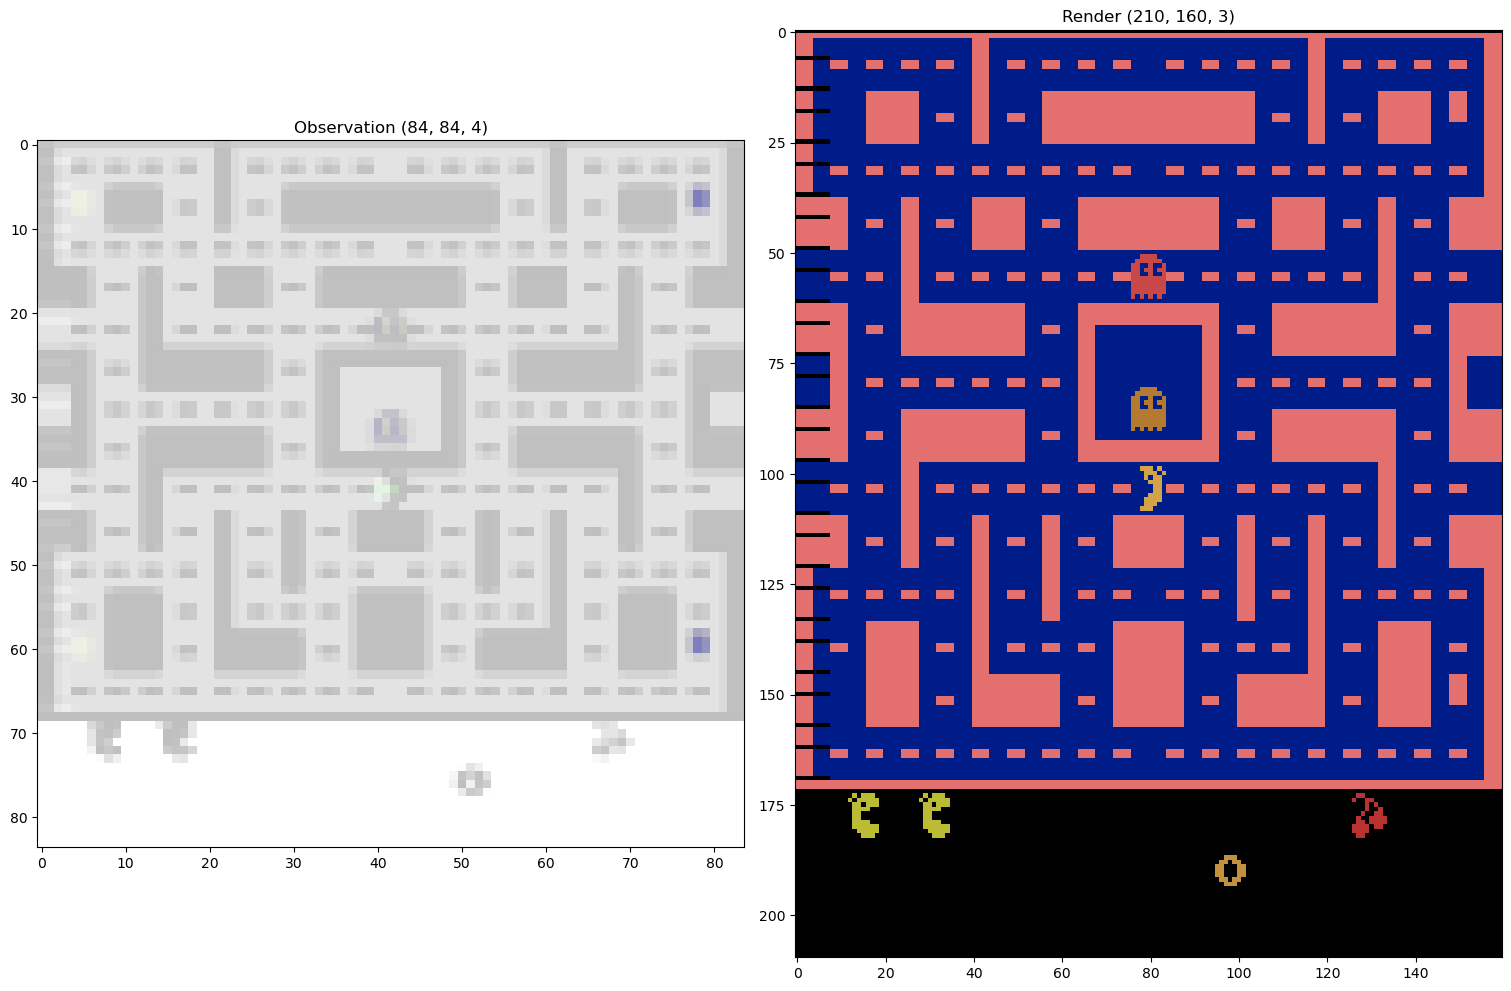

In [16]:
env_visualization(frames=MP_frames,obsFrame=MP_obsFrame)

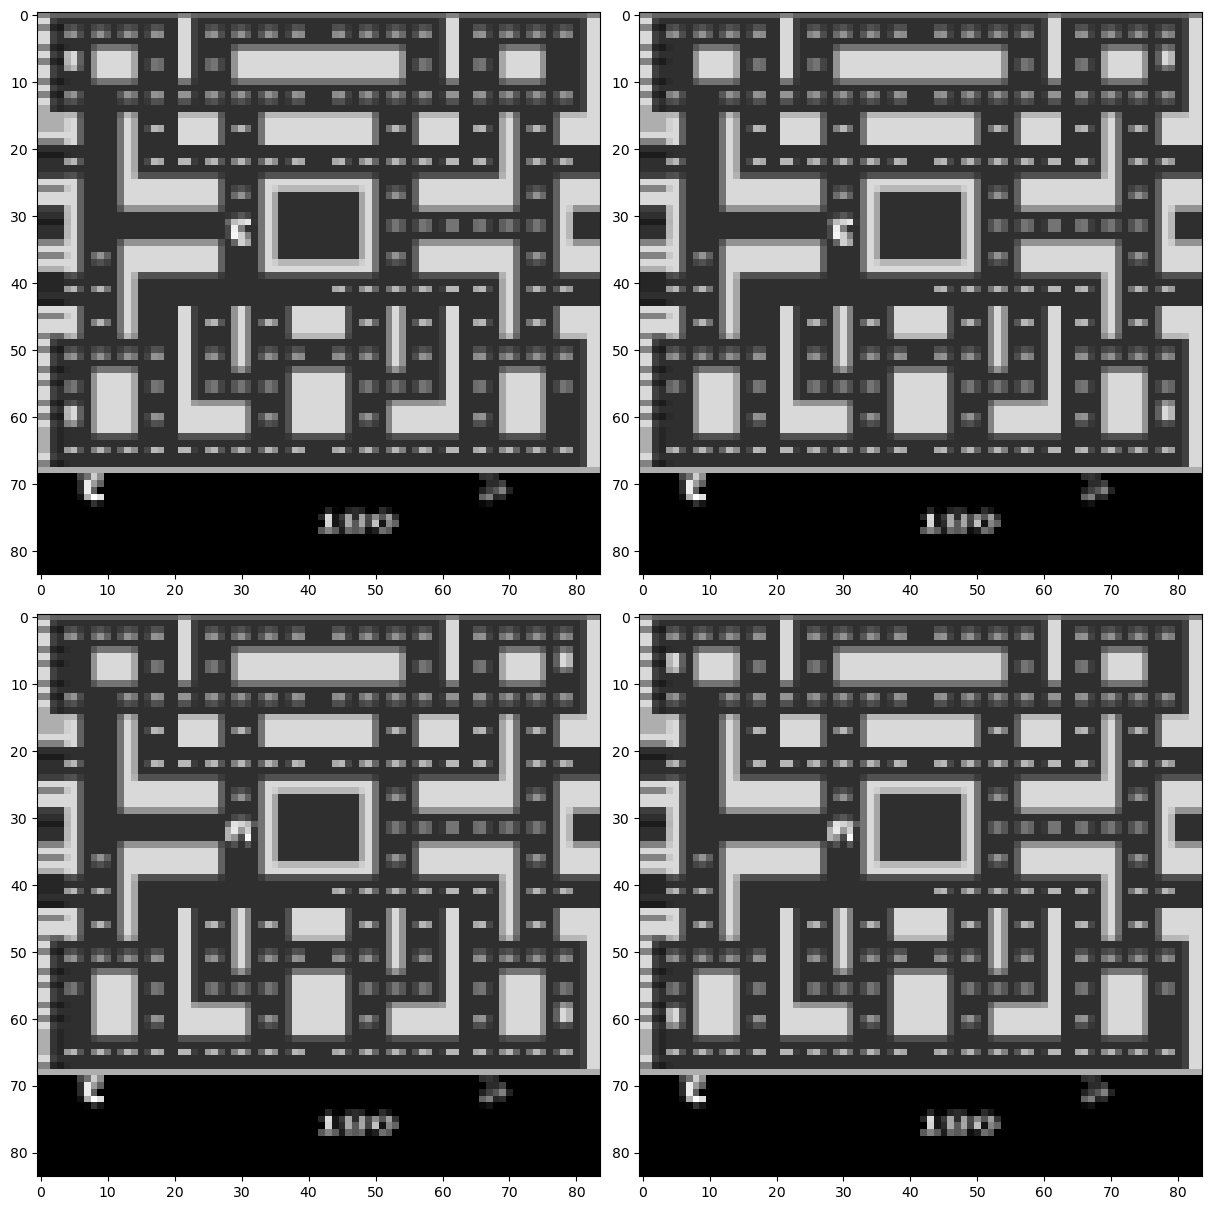

In [17]:
unstacked_frames(obsFrame=MP_obsFrame)

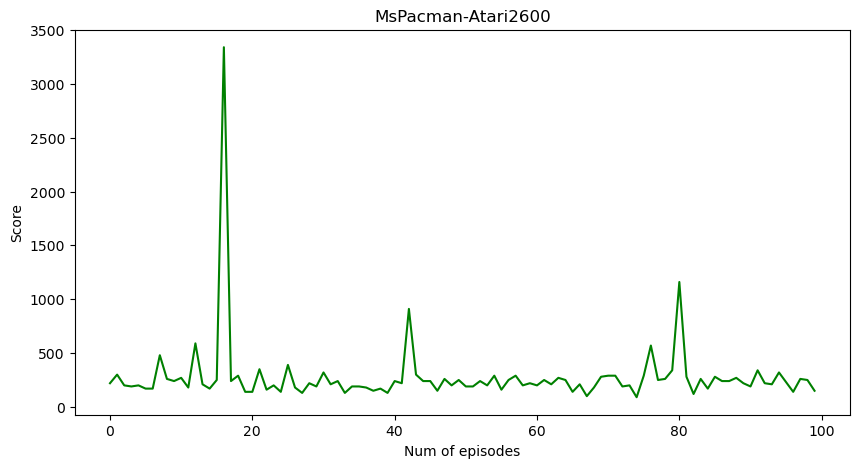

In [18]:
score_visualization(agent=MP_agent,gameIndex=1)